In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [6]:
node = np.load("/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/node_order.npy")

In [15]:
nov = np.load('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p11_done.npy')

In [36]:
#Unfallort am 20.11.23
x = 404920
p = np.where(node== x)
nov_res = nov.reshape(30, 288, 16972, 3)

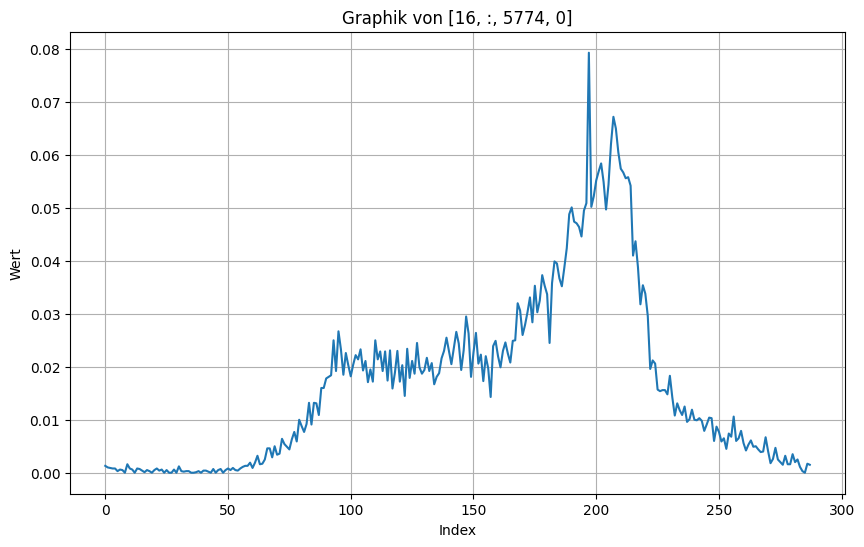

In [51]:
# Slice aus dem Array extrahieren
slice_data = nov_res[19, :, 3344, 1]

# Graphik erstellen
plt.figure(figsize=(10, 6))
plt.plot(slice_data)  # Beispiel: Line Plot, kann je nach den Daten angepasst werden
plt.title("Graphik von [16, :, 5774, 0]")
plt.xlabel("Index")
plt.ylabel("Wert")
plt.grid(True)
plt.show()

In [113]:
incidince = pd.read_csv('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/incidents.csv', sep = "\t")

In [115]:
sort_value = incidince.sort_values(by=['Duration (mins)'], ascending=False)
clean_inc = sort_value.drop_duplicates(subset=['Fwy', "Abs PM", "LOCATION", "type", "dt"], keep='first')
clean_inc = clean_inc.dropna(subset= ['Fwy', 'Abs PM'])

In [117]:
# Konvertiert die 'dt' Spalte in das Pandas Datetime-Format
clean_inc['dt'] = pd.to_datetime(clean_inc['dt'])

# Extrahiert das Datum (ohne Uhrzeit) und speichert es in einer neuen Spalte 'date'
clean_inc["date"] = clean_inc["dt"].dt.date

# Extrahiert die Uhrzeit (ohne Datum) und speichert sie in einer neuen Spalte 'time'
clean_inc["time"] = clean_inc["dt"].dt.time

# Sicherstellen, dass Abs PM numerisch ist
clean_inc['Abs PM'] = pd.to_numeric(clean_inc['Abs PM'], errors='coerce')

In [119]:
clean_inc

,Incident Id,Duration (mins),Fwy,Abs PM,AREA,LOCATION,DESCRIPTION,type,dt,date,time
122228,21569925,999,I405-N,47.1,LAFSP,I405 N / W Manchester Blvd,1182-Trfc Collision-No Inj,accident,2023-04-05 06:35:00,2023-04-05,06:35:00
436681,22044624,999,I605-N,3.8,Santa Fe Springs,I605 N / Carson St,CLOSURE of a Road,other,2023-11-29 23:34:00,2023-11-29,23:34:00
321375,21870867,997,I5-S,144.7,Altadena,I5 S / Western Ave,1125-Traffic Hazard,hazard,2023-09-02 17:08:00,2023-09-02,17:08:00
69766,21489324,997,I5-N,103.2,Santa Ana,I5 N / 1st St,1181-Trfc Collision-Minor Inj,accident,2023-02-25 19:24:00,2023-02-25,19:24:00
256541,21773139,996,SR60-E,53.9,Riverside FSP,Sr60 E Wo / Frederick St,20002-Hit and Run No Injuries,accident,2023-07-17 17:35:00,2023-07-17,17:35:00
...,...,...,...,...,...,...,...,...,...,...,...
302709,21842497,-79,I805-S,26.9,North FSP,I805 S / MIRA MESA,1179-Trfc Collision-1141Enrt,accident,2023-08-20 10:41:00,2023-08-20,10:41:00
307717,21849794,-82,I215-N,36.7,Riverside FSP,I215 N So / Center St,1182-Trfc Collision-No Inj,accident,2023-08-23 14:59:00,2023-08-23,14:59:00
229276,21732181,-83,I15-N,76.8,Temecula FSP,I15 N / Sr74 (central) (tem),1183-Trfc Collision-Unkn Inj,accident,2023-06-27 14:47:00,2023-06-27,14:47:00
197256,21684348,-95,I5-S,9.7,BCFSP,I5 S / Mile Of Cars So (24th_marina),1125-Traffic Hazard,hazard,2023-06-03 12:47:00,2023-06-03,12:47:00


In [120]:
clean_inc = clean_inc.sort_values(['Fwy', 'date', 'time'])
df = clean_inc.reset_index(drop=True)

In [123]:
def remove_duplicates(data):
    seen = {}
    to_drop = set()

    for index, row in data.iterrows():
        # Erstelle einen eindeutigen Schlüssel basierend auf den Kriterien
        key = (
            row['Fwy'], 
            round(row['Abs PM']),  # Abs PM gerundet für Buckets
            row['DESCRIPTION']
        )

        # Überprüfen, ob ein ähnlicher Eintrag bereits existiert
        if key in seen:
            prev_time = seen[key]
            # Prüfen, ob Zeitdifferenz kleiner oder gleich 15 Minuten ist
            if abs((row['dt'] - prev_time).total_seconds()) <= 15 * 60:
                to_drop.add(index)
            else:
                seen[key] = row['dt']  # Aktualisiere den Zeitstempel
        else:
            seen[key] = row['dt']  # Speichere Zeitstempel für neuen Schlüssel

    # Entferne Duplikate
    return data.drop(index=to_drop)

In [124]:
cleaned_df = remove_duplicates(df)

In [125]:
cleaned_df

,Incident Id,Duration (mins),Fwy,Abs PM,AREA,LOCATION,DESCRIPTION,type,dt,date,time
0,21379357,179,I10-E,142.5,Indio,I10 E WO / SR86,20002-Hit and Run No Injuries,accident,2023-01-03 08:54:00,2023-01-03,08:54:00
1,21379356,2,I10-E,103.8,San Gorgonio Pass,I10 E / Morongo Tr Onr,ANIMAL-Live or Dead Animal,hazard,2023-01-03 10:51:00,2023-01-03,10:51:00
2,21379525,0,I10-E,13.4,Central LA,I10 E / Maple Ave Ofr,1125-Traffic Hazard,hazard,2023-01-03 15:23:00,2023-01-03,15:23:00
3,21379585,0,I10-E,56.2,San Bernardino FSP,I10 E Wo / I15,1125-Traffic Hazard,hazard,2023-01-03 15:50:00,2023-01-03,15:50:00
4,21379584,8,I10-E,230.1,Blythe,I10 E / Mesa Exit 232 Mm 145,1166-Defective Traffic Signals,other,2023-01-03 15:54:00,2023-01-03,15:54:00
...,...,...,...,...,...,...,...,...,...,...,...
473079,21868500,145,US95-N,2.4,Blythe,Us95 N So / 8th Mm 2,FLOOD-Roadway Flooding,hazard,2023-09-01 14:15:00,2023-09-01,14:15:00
473080,21901626,69,US95-N,21.3,Blythe,Us95 N / Aha Quin Rd,1125-Traffic Hazard,hazard,2023-09-18 15:29:00,2023-09-18,15:29:00
473081,21605792,9,US95-S,93.8,Needles,Us95 S Ofr / I40 E,1179-Trfc Collision-1141 Enrt,accident,2023-04-24 01:40:00,2023-04-24,01:40:00
473082,21828780,33,US95-S,93.8,Needles,Us95 S Ofr / I40 E,1179-Trfc Collision-1141 Enrt,accident,2023-08-13 23:20:00,2023-08-13,23:20:00


In [126]:
out= "/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/incidents.csv"
cleaned_df.to_csv(out, sep="\t")